In [2]:
import pandas as pd
import numpy  as np

dados = '/content/drive/MyDrive/Colab Notebooks/Dados/IRIS.csv'

df_original = pd.read_csv(dados)
df_original

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df_original['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [5]:
X = df_original.drop(columns='species')
y = df_original['species']

In [6]:
from sklearn.model_selection import train_test_split

X, X_teste, y, y_teste = train_test_split(X,y, random_state=42, stratify=y, test_size=0.15)
X_treino, X_val, y_treino, y_val = train_test_split(X,y, random_state=42, stratify=y)

In [7]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(max_depth=10)
modelo.fit(X_treino, y_treino)
y_pred = modelo.predict(X_val)

print(f'Acurácia de Treino: {modelo.score(X_treino,y_treino) * 100}')
print(f'Acurácia de Validação: {modelo.score(X_val,y_val) * 100}')

Acurácia de Treino: 100.0
Acurácia de Validação: 96.875


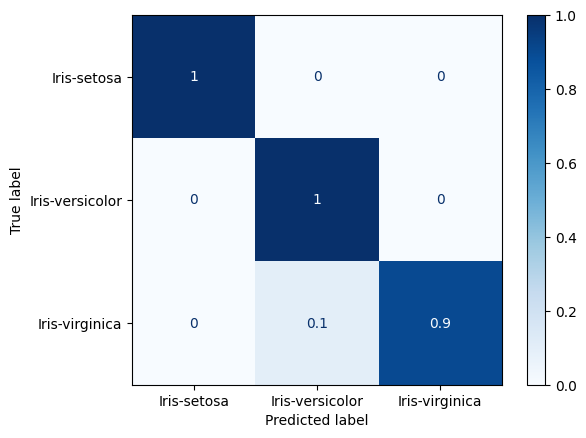

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

matriz_confusao = confusion_matrix(y_val, y_pred)

ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues')

In [11]:
from sklearn.metrics import classification_report

report = classification_report(y_val, y_pred)
print('Relátorio de Classificação:\n', report)

Relátorio de Classificação:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        32
      macro avg       0.97      0.97      0.97        32
   weighted avg       0.97      0.97      0.97        32



In [20]:
from sklearn.model_selection import cross_validate, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_resultados = cross_validate(modelo, X, y, cv=skf)
cv_resultados['test_score']

array([0.96153846, 0.88461538, 0.96      , 0.96      , 0.96      ])

In [21]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'intervalo de confiança: [{media - 2 * desvio_padrao}, {min(media + 2 * desvio_padrao, 1.0)}]')

intervalo de confiança: [0.8846036715729214, 1.0]
